## Feature Selection Techniques

<hr>

### Agenda
1. Introduction to Feature Selection
2. VarianceThreshold
3. Chi-squared stats
4. ANOVA using f_classif
5. Univariate Linear Regression Tests using f_regression
6. F-score vs Mutual Information
7. Mutual Information for discrete value
8. Mutual Information for continues value
9. SelectKBest
10. SelectPercentile


<hr>

### 1. Introduction to Feature Selection
* Selecting features from the dataset
* Improve estimator's accuracy
* Boost preformance for high dimensional datsets
* Below we will discuss univariate selection methods
* Also, feature elimination method

In [ ]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [ ]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [ ]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['A'] = le.fit_transform(df.A)

In [ ]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [ ]:
vt = feature_selection.VarianceThreshold(threshold=.3)

In [ ]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [ ]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### 3. Chi-Square for Non-negative feature & class
* Feature data should be booleans or count
* Supervised technique for feature selection
* Target should be discrete

In [ ]:
df = pd.read_csv('tennis.csv.txt')

In [ ]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [ ]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [ ]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [ ]:
chi2

array([2.02814815, 0.02222222, 1.4       , 0.53333333])

In [ ]:
pval

array([0.15440865, 0.88149745, 0.23672357, 0.46520882])

* Higher value means more important feature for target

### 4. ANOVA using f_classif
* For feature variables continues in nature
* And, target variable discrete in nature
* Internally, this method uses ratio of variation within a columns & variation across columns

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer_data = load_breast_cancer()

In [ ]:
X = cancer_data.data
Y = cancer_data.target

In [ ]:
chi2, pval = feature_selection.f_classif(X,Y)

In [ ]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

In [ ]:
pval

array([8.46594057e-096, 4.05863605e-025, 8.43625104e-101, 4.73456431e-088,
       1.05185036e-018, 3.93826311e-056, 9.96655576e-084, 7.10115016e-116,
       5.73338403e-016, 7.59936804e-001, 9.73894866e-050, 8.43332029e-001,
       1.65190518e-047, 5.89552139e-046, 1.10296609e-001, 9.97599465e-013,
       8.26017617e-010, 3.07230877e-024, 8.76641818e-001, 6.30735508e-002,
       8.48229192e-116, 1.07805749e-030, 5.77139714e-119, 2.82884770e-097,
       6.57514363e-026, 7.06981635e-055, 2.46466396e-072, 1.96909971e-124,
       2.95112058e-025, 2.31643245e-015])

* Each value represents importance of a feature

### 5. Univariate Regression Test using f_regression
* Linear model for testing the individual effect of each of many regressors.
* Correlation between each value & target is calculated
* F-test captures linear dependency

In [ ]:
from sklearn.datasets import california_housing

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
house_data = california_housing.fetch_california_housing()

In [ ]:
X,Y = house_data.data, house_data.target

In [ ]:
F, pval = feature_selection.f_regression(X,Y)

In [ ]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

In [ ]:
pval

array([0.00000000e+000, 2.76186068e-052, 7.56924213e-107, 1.91258939e-011,
       3.97630785e-004, 6.48344237e-004, 2.93985929e-096, 3.92332207e-011])

* Columns with top F values are the selected features 

### 6. F score verses Mutual Information

In [ ]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [ ]:
f, pval = feature_selection.f_regression(X,y)

In [ ]:
f

array([187.42118421,  52.52357392,   0.47268298])

In [ ]:
pval

array([3.19286906e-39, 8.50243215e-13, 4.91915197e-01])

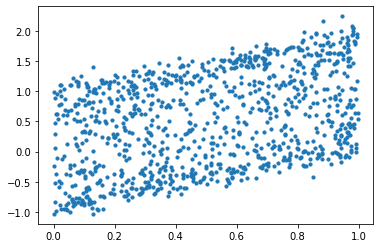

In [ ]:
plt.scatter(X[:,0],y,s=10)

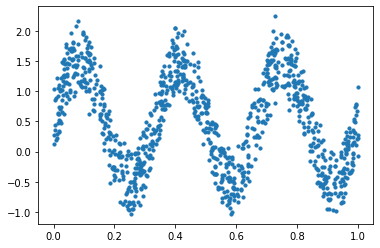

In [ ]:
plt.scatter(X[:,1],y,s=10)

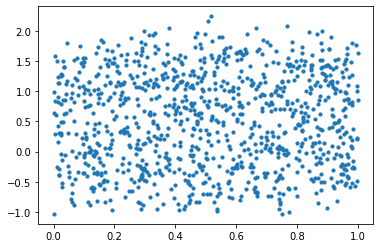

In [ ]:
plt.scatter(X[:,2],y,s=10)

### 7. Mutual Information for regression using mutual_info_regression
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is continues in nature

In [ ]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

### 8. Mutual Information for classification using mutual_info_classification
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is discrete in nature

In [ ]:
adult_data = pd.read_csv('adult-data.csv')

In [ ]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [ ]:
adult_data

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labels = dict()
for col in cat_cols:
    le = LabelEncoder()
    dc = dict()
    adult_data[col]  = le.fit_transform(adult_data[col])
    for i,j in enumerate(le.classes_):
        dc[j] = i
    labels[col] = dc

In [ ]:
labels

{'workclass': {' ?': 0,
  ' Federal-gov': 1,
  ' Local-gov': 2,
  ' Never-worked': 3,
  ' Private': 4,
  ' Self-emp-inc': 5,
  ' Self-emp-not-inc': 6,
  ' State-gov': 7,
  ' Without-pay': 8},
 'education': {' 10th': 0,
  ' 11th': 1,
  ' 12th': 2,
  ' 1st-4th': 3,
  ' 5th-6th': 4,
  ' 7th-8th': 5,
  ' 9th': 6,
  ' Assoc-acdm': 7,
  ' Assoc-voc': 8,
  ' Bachelors': 9,
  ' Doctorate': 10,
  ' HS-grad': 11,
  ' Masters': 12,
  ' Preschool': 13,
  ' Prof-school': 14,
  ' Some-college': 15},
 'marital-status': {' Divorced': 0,
  ' Married-AF-spouse': 1,
  ' Married-civ-spouse': 2,
  ' Married-spouse-absent': 3,
  ' Never-married': 4,
  ' Separated': 5,
  ' Widowed': 6},
 'occupation': {' ?': 0,
  ' Adm-clerical': 1,
  ' Armed-Forces': 2,
  ' Craft-repair': 3,
  ' Exec-managerial': 4,
  ' Farming-fishing': 5,
  ' Handlers-cleaners': 6,
  ' Machine-op-inspct': 7,
  ' Other-service': 8,
  ' Priv-house-serv': 9,
  ' Prof-specialty': 10,
  ' Protective-serv': 11,
  ' Sales': 12,
  ' Tech-support'

In [ ]:
adult_data

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
feature_selection.mutual_info_classif(adult_data, adult_data.Salary)

array([0.00450546, 0.07149844, 0.01623439, 0.03322039, 0.06770706,
       0.06700048, 0.11119227, 0.06658243, 0.11714063, 0.01273927,
       0.02971436, 0.08497086, 0.03513469, 0.04077034, 0.007671  ,
       0.5525641 ])

In [ ]:
adult_data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'Salary'],
      dtype='object')

### 9. SelectKBest
* SelectKBest returns K important features based on above techniques
* Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [ ]:
adult_data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [ ]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [ ]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [ ]:
selector.scores_

array([9.50753155e-01, 1.88670731e+03, 8.69361605e+01, 2.91559359e+00,
       2.06129509e+02, 4.12009578e+03, 1.34685178e+03, 1.86500322e+02,
       2.18764583e+03, 1.68934788e+02, 1.59310791e+03, 1.70915006e+03,
       7.54830452e+02, 1.81338628e+03, 8.17155711e+00])

In [ ]:
data.shape

(32561, 7)

In [ ]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [ ]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [ ]:
selector.scores_

array([0.00246615, 0.06583684, 0.01897804, 0.03310732, 0.06446268,
       0.06537328, 0.1140212 , 0.06547967, 0.1150124 , 0.00460621,
       0.01958295, 0.08043792, 0.03576835, 0.04377456, 0.00486184])

In [ ]:
data.shape

(32561, 7)

### 10. SelectPercentile
* Selecting top features whose importances are in configured parameter
* Default is top 10 percentile

In [ ]:
selector = feature_selection.SelectPercentile(percentile=50, score_func=feature_selection.mutual_info_classif)

In [ ]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [ ]:
data.shape

(32561, 7)